# MSBD5001 Foundations of Data Analytics
# Tutorial 4
# Python Pandas Basics

In this section, we will introduce the Python library, Pandas.



- [Introduction](#intro)
- [Installation](#install)
- [Import NumPy and Pandas](#import)
- [Series and DataFrame](#dataframe)
- [Converting Data Types](#convert_data_types)
- [Selecting a Subset of DataFRame](#select_subset)
- [Adding and Removing Rows and Columns](#add_remove)
- [Applying Functions to a Column in a DataFrame](#apply)
- [File IO](#fileio)
- [Descriptive Statistics](#descriptives)
- [Handling Missing Values](#missing)


## What is Pandas?

Pandas stands for Panel Data Analysis.

Pandas is a library for structured data operations and manipulations
It is built on top of NumPy and is used for data wrangling and preparation.
<url>https://pandas.pydata.org/docs/index.html</url>

<a name="intro"></a>
## NumPy vs Pandas

||NumPy|Pandas|
|:-|:-|:-|
|Target Data  |Numerical data (arrays and matrix)|Tabular data|
|Main Data Object	| ndarray (multi-dimensional array) | Data frame (2d table) and series (1d array)|
|Usage   | Numerical calculations | Data analysis and visualization |
| Machine learning, Deep learning | NumPy arrays can be directly fed as inputs to libraries, like, Scikit, Tensorflow	| Data frame and series cannot be directly fed as inputs to libraries, like, Scikit, Tensorflow |
| Memory | Consume less memory | Consume more memory |
| Performance | Has a better performance when number of rows is 50K or less	| Has a better performance when number of rows is 500K or more |
| Indexing	| Indexing of NumPy arrays is very fast	| Indexing of the Pandas series is very slow |




<a name="install"></a>
## Installation

- conda
  - If you have already installed anaconda, in “Anaconda Prompt”, type in the terminal:
       ```conda install pandas```

- pip 
  - To install Pandas in Jupyter Notebook using pip, run the following cell:

In [1]:
!pip install pandas

For more information: [https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html](https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html)

<a name="import"></a>
## Import the Pandas and NumPy packages

In [2]:
import numpy as np
import pandas as pd

- In the following examples, it is assumed that the name, pd, is bound to Pandas. 
- In some examples, it is assumed that NumPy is imported and the name, np, is bound to NumPy.

<a name="dataframe"></a>
## Pandas Series and DataFrame

A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, categorical data and more) in columns. It is like a table in spreadsheet.

A Panda Series is like a column in a table.

| Dimensions | Name | Description |
|:-|:-|:-|
| 1 | Series | 1D labeled homogeneously-typed array |
| 2	| DataFrame	| General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed column |


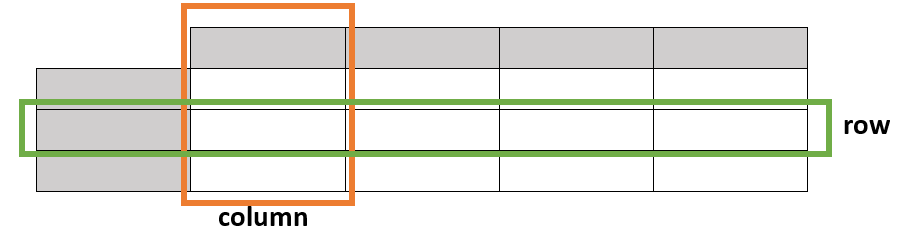

For example, let's have a table with 3 columns for storing the name, age and gender of people. Each of the column has a column label. The values stored in the two columns, Name and Gender, are strings, while the values stored in the column, Age, are numbers. 

|Name|Age|Gender|
|----|---|------|
|Bob |4|Male|
|Agnes|6|Female|
|Kevin|5|Male|
|Stuart|5|Male|

### Creating Series

To create a series for storing the column, Age, only:

In [3]:
ages = pd.Series([4, 6, 5, 5], name='Age')
print(ages)

0    4
1    6
2    5
3    5
Name: Age, dtype: int64


Each of the value in the series has a corresponding row label. In the above example, the row labels (indices) are 0, 1, 2, 3.

In [4]:
print("ages[1]=", ages[1])

ages[1]= 6


We can also assign our own labels (indices):

In [5]:
ages = pd.Series([4, 6, 5, 5], name='Age', index = ["d", "a", "c", "b"])
print(ages)

d    4
a    6
c    5
b    5
Name: Age, dtype: int64


In [6]:
print('ages["a"]=', ages["a"])

ages["a"]= 6


### Creating data frame

Create a DataFrame using a dictionary. 

In [7]:
d = {'Name':['Bob', 'Agnes', 'Kevin', 'Stuart'], 
     'Age':[4, 6, 5, 5], 'Gender':['Male', 'Female', 'Male', 'Male']}
df = pd.DataFrame(d)
print (df)
print (df.dtypes)

     Name  Age  Gender
0     Bob    4    Male
1   Agnes    6  Female
2   Kevin    5    Male
3  Stuart    5    Male
Name      object
Age        int64
Gender    object
dtype: object


Note: Data types are inferred. pandas.DataFrame.dtypes returns the dyptes in the data frame.

Create a DataFrame using NumPy array.

In [8]:
a = np.array([['Bob', 4, 'Male'], ['Anges', 6, 'Female'], ['Kevin', 5, 'Male'], ['Stuart', 5, 'Male']])
df2 = pd.DataFrame(a, columns=['Name','Age','Gender'])
print (df2)
print (df2.dtypes)

     Name Age  Gender
0     Bob   4    Male
1   Anges   6  Female
2   Kevin   5    Male
3  Stuart   5    Male
Name      object
Age       object
Gender    object
dtype: object


<a name="convert_data_types"></a>
## Converting data types

We can use astype() to convert a column to a specific data type

In [9]:
df3 = df2.astype({'Age':'int'})
df3.dtypes

Name      object
Age        int32
Gender    object
dtype: object

In [10]:
df3.index = ['A', 'B', 'C', 'D'] # Change the default index (label)
df3

,Name,Age,Gender
A,Bob,4,Male
B,Anges,6,Female
C,Kevin,5,Male
D,Stuart,5,Male


<a name="select_subset"></a>
## Selecting a Subset of the DataFrame

### Selecting a Single Cell
- DataFrame.at[]
    - Access a single value given a row/column **label** pair.

In [11]:
df.at[1, 'Name']

'Agnes'

### Selecting a Subset

#### Selecting a particular column
- indicate the column label between a pair of square brackets.

In [12]:
df['Age']

0    4
1    6
2    5
3    5
Name: Age, dtype: int64

#### Selecting multiple columns
- use a list of column names within the selection brackets [].

In [13]:
df[['Name', 'Age']]

,Name,Age
0,Bob,4
1,Agnes,6
2,Kevin,5
3,Stuart,5


#### Selecting the first rows or the last rows
- dataFrame.head(n) – returns the first n rows, if n is missing, the default is 5 rows. 
- dataFrame.tail(n) – returns the last n rows, if n is missing, the default is 5 rows.

In [14]:
df.head(3)

,Name,Age,Gender
0,Bob,4,Male
1,Agnes,6,Female
2,Kevin,5,Male


#### Select some specific rows by applying a Boolean series
- The expression below returns a Boolean series of whether the corresponding row with the value of the column ‘Age’ larger than 20.


In [15]:
df['Age'] > 5 # Return a Boolean series

0    False
1     True
2    False
3    False
Name: Age, dtype: bool

Use the Boolean series to filter the rows

In [16]:
df[ df['Age'] > 5 ] # Return the rows which has 'Age' > 20

,Name,Age,Gender
1,Agnes,6,Female


#### Selecting specific rows and columns:
- pandas.DataFrame.loc – Access a group of rows and columns by label(s) or a boolean array
- pandas.DataFrame.iloc – Access a group of rows and columns by indexing (positions)

In [17]:
df.loc[0] # Return the row with index 0

Name       Bob
Age          4
Gender    Male
Name: 0, dtype: object

In [18]:
df.loc[0, 'Name'] # Return the element at row index 0 and column label 'Name'

'Bob'

In [19]:
df.loc[ df['Age'] > 5, 'Name'] # Return the names with age > 20

1    Agnes
Name: Name, dtype: object

In [20]:
df.iloc[1] # Return rows with index 1

Name       Agnes
Age            6
Gender    Female
Name: 1, dtype: object

In [21]:
df.iloc[[1, 2]] # Return rows with index 1 & 2

,Name,Age,Gender
1,Agnes,6,Female
2,Kevin,5,Male


In [22]:
df.iloc[0, 1] # Return the element at row index 0 and column index 1

4

#### Slicing with Row and Column Numbers

In [23]:
df.loc[:2, 'Name'] # Return rows 0 to 2-1 (slicing) and column label 'Name'

0      Bob
1    Agnes
2    Kevin
Name: Name, dtype: object

In [24]:
df.iloc[0:2, 0:1] # Return the rows before index 2 and 
                  # columns before index 1

,Name
0,Bob
1,Agnes


#### Slicing with Labels

In [25]:
df3.loc['B':'D', 'Age':'Gender']

,Age,Gender
B,6,Female
C,5,Male
D,5,Male


Both loc & iloc can be used to modify values, but iloc will give out-of-bound error.

In [26]:
df.iloc[1, 1] = 20
df.loc[0, 'Age'] = 23 # Modify a value
df.loc[ df.shape[0] ] = ['David', 17, 'Male'] # Add a new row
df

,Name,Age,Gender
0,Bob,23,Male
1,Agnes,20,Female
2,Kevin,5,Male
3,Stuart,5,Male
4,David,17,Male


<a name="add_remove"></a>
### Adding and Removing Rows and Columns

#### Adding a Column

In [27]:
df['Dept'] = np.array(['CSE', 'ELEC', 'CIVIL', 'CSE', 'CSE'])
print(df)

     Name  Age  Gender   Dept
0     Bob   23    Male    CSE
1   Agnes   20  Female   ELEC
2   Kevin    5    Male  CIVIL
3  Stuart    5    Male    CSE
4   David   17    Male    CSE


#### Removing a Column

In [28]:
df = df.drop('Dept', axis=1)
print(df)

     Name  Age  Gender
0     Bob   23    Male
1   Agnes   20  Female
2   Kevin    5    Male
3  Stuart    5    Male
4   David   17    Male


#### Removing Rows

In [29]:
print(df.drop(df.index[[3, 4]])) # removing row number 3 & 4

    Name  Age  Gender
0    Bob   23    Male
1  Agnes   20  Female
2  Kevin    5    Male


<a name="apply"></a>
## Applying Functions to a Column in a DataFrame
We can apply functions to values in a DataFrame.

In [30]:
print (df.Age.apply(lambda x: x**2) )

0    529
1    400
2     25
3     25
4    289
Name: Age, dtype: int64


<a name="fileio"></a>
## File I/O

### Output
- [pandas.DataFrame.to_csv()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html?highlight=to_csv#pandas.DataFrame.to_csv)
– write the DataFrame to a csv file.
- e.g. To write the DataFrame, df, to a csv file, “output.csv”: 
```df.to_csv("output.csv")```


In [31]:
student_df = pd.DataFrame({'Name':['Bob', 'Agnes', 'Gru', 'Stuart'], 'Age':[6, 5, 30, 4], 'Score':[88, 96, 52, np.nan]})
student_df.to_csv("output.csv", index=False)

### Input
- [pandas.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv)
– read the data stored in a csv (comma-separated values) file into a DataFrame. 
- E.g. To read the csv file, “input.csv” to a DataFrame, df:
```df = pd.read_csv("input.csv")``` 
- For the other format of input data, such as, excel, json, html, etc.:  
    [https://pandas.pydata.org/docs/user_guide/io.html#io](https://pandas.pydata.org/docs/user_guide/io.html#io)
- Note: by default, the column names are inferred from row 0 of the csv file. 


In [32]:
new_student_df = pd.read_csv("output.csv") # Read a DataFrame from titanic.csv
new_student_df # Show the DataFrame

,Name,Age,Score
0,Bob,6,88.0
1,Agnes,5,96.0
2,Gru,30,52.0
3,Stuart,4,NaN


<a name="descriptives"></a>
## Descriptive Statistics

- pandas.DataFrame.describe() – give an overview of the data

In [33]:
new_student_df.describe()

,Age,Score
count,4.000000,3.000000
mean,11.250000,78.666667
std,12.526638,23.437861
min,4.000000,52.000000
25%,4.750000,70.000000
50%,5.500000,88.000000
75%,12.000000,92.000000
max,30.000000,96.000000


- pandas.DataFrame.max() – return the maximum value
- pandas.DataFrame.min() – return the minimum value

In [34]:
new_student_df['Age'].max() # Return the max of the Age column 

30

In [35]:
new_student_df[ ['Age','Score'] ].min() # Return max of the Age and Fare columns

Age       4.0
Score    52.0
dtype: float64

- pandas.DataFrame.mean() - find the mean along an axis or particular column(s) 
- pandas.DataFrame.median() - find the median along an axis or particular column(s)
- For more details: [https://pandas.pydata.org/docs/user_guide/basics.html#descriptive-statistics](https://pandas.pydata.org/docs/user_guide/basics.html#descriptive-statistics)

In [36]:
new_student_df['Age'].mean() # Return the mean of the Age column 

11.25

In [37]:
new_student_df['Age'].median() # Return the median of the Age column 

5.5

<a name="missing"></a>
## Handling Missing Values

- Detect missing values:
  - pandas.isna() or pandas.DataFrame.isnull()
    - Return a Boolean DataFrame indicating if the values are NA (None, numpy.nan)


In [38]:
new_student_df['Score'].isna()

0    False
1    False
2    False
3     True
Name: Score, dtype: bool

- Detect existing values:
  - pandas.DataFrame.notna() or pandas.DataFrame.notnull()
    - Return a Boolean DataFrame indicating if the values are not NA (None, numpy.nan)
- Fill missing values with specified values or methods:
  - pandas.DataFrame.fillna()
    - Return a DataFrame with NA values filled


In [39]:
new_student_df['Score'].fillna( 0 )

0    88.0
1    96.0
2    52.0
3     0.0
Name: Score, dtype: float64

- Removing missing values:
    - pandas.DataFrame.dropna()
        - Return a DataFrame with NA values dropped

In [40]:
new_student_df['Score'].dropna()

0    88.0
1    96.0
2    52.0
Name: Score, dtype: float64